### Constants and Imports

In [1]:
pickle_rel_path = '../datasets/notmnist/notMNIST.pickle'
import os
import pickle
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.metrics

### Read pickle file
The file contains:  
train_dataset, train_labels  
test_dataset, test_labels  
valid_dataset, valid_labels  

In [2]:
file_dir = os.path.dirname(os.path.realpath('__file__'))
pickle_path = os.path.abspath(os.path.join(file_dir, pickle_rel_path))
print('Pickle location:',pickle_path)

Pickle location: C:\Users\lgess\Documents\repo\learning_ai\datasets\notmnist\notMNIST.pickle


In [3]:
with open(pickle_path,'rb') as file:
    datasets = pickle.load(file)
print(datasets.keys())

dict_keys(['train_dataset', 'train_labels', 'valid_dataset', 'valid_labels', 'test_dataset', 'test_labels'])


In [4]:
train_dataset = datasets['train_dataset']
train_labels = datasets['train_labels'] 
validate_dataset = datasets['valid_dataset']
validate_labels = datasets['valid_labels'] 
test_dataset = datasets['test_dataset']
test_labels = datasets['test_labels'] 

### Sample data

In [5]:
def show_sample(sample_image, label):
    plt.figure()
    plt.imshow(sample_image)
    print('Label:', label)

Label: 3


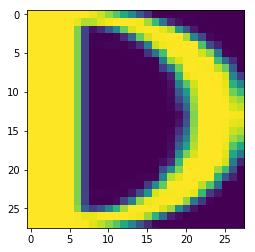

In [6]:
num = 1
show_sample(train_dataset[num],train_labels[num])


### Adjust data representation

In [7]:
def reshape_dataset(dataset):
    shape = dataset.shape
    return dataset.reshape((shape[0],shape[1]*shape[2]))
    
r_train_dataset = reshape_dataset(train_dataset)
r_test_dataset = reshape_dataset(test_dataset)

In [8]:
train_size = 20000
classifier = sklearn.linear_model.LogisticRegression(solver='sag', verbose=1)
classifier.fit(r_train_dataset[0:train_size],train_labels[0:train_size])

max_iter reached after 17 seconds


C:\Users\lgess\Miniconda3\envs\learning_ai_env\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 18 seconds
max_iter reached after 18 seconds
max_iter reached after 18 seconds
max_iter reached after 19 seconds
max_iter reached after 19 seconds
max_iter reached after 18 seconds
max_iter reached after 19 seconds
max_iter reached after 18 seconds
max_iter reached after 18 seconds


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.0min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=1, warm_start=False)

In [26]:
predicted = classifier.predict(r_test_dataset)

In [27]:
sklearn.metrics.accuracy_score(test_labels,predicted)

0.87460000000000004